# Suicide Rates Overview 1985 to 2016.

# Description

In this analysis I will be focusing at investigating factors that could influence suicide rates among different user cohorts and countries.

The dataset includes info on suicide rates among different cohorts together with the country, region and country economical status. This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

In [30]:
# import all packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Structure

#### The dataset contains below variables:

- country     - country to where the statistics belong.
- year        - year from where the statistics was taken.
- sex         - cohort sex.
- age         - cohort age group.
- suicides_no - the total number of sucides in the country for the given cohort.
- population  - the size of the cohort for the given year.
- suicides/100k pop - suicides per 100k for this particular cohort.
- contry-year - country-year pair.
- HDI for year - Human Development index for the given year.
- gdp_for_year- Country GDP.
- gdp_per_capita  - Country GDP per household.
- generation - social generation to which the current generation belong.

In [31]:
df= pd.read_csv("C:/Users/varshith reddy/OneDrive/Desktop/EDAP demo/Suicide Rates Overview.csv")

In [32]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


#### What features in the dataset will help support the investigation?
The primary focus for the analysis will be around universal suicide ratio of the number of suicides per 100k population.

This metric is taken as a centralised object of analysis as it is independent from population size and therefore will be more objective in representing general trends.

#### Shape of the dataset

In [7]:
df.shape

(27820, 12)

#### Size of the dataset

In [25]:
df.size

333840

#### Check Datatypes in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


# Data cleaning

In [14]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

### Insights:
- From above we can see HDI for year having null values.

# Null value Percentage:

In [8]:
col_name=['HDI for year']
(df[col_name].isnull().sum()/len(df))*100

HDI for year    69.935298
dtype: float64

- From above we can see 69% of null values are present in that column so we can not drop those values. it effects the distribution of respective column.

## Converting year column into datetime format

In [18]:
df["year"]=pd.to_datetime(df["year"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country             27820 non-null  object        
 1   year                27820 non-null  datetime64[ns]
 2   sex                 27820 non-null  object        
 3   age                 27820 non-null  object        
 4   suicides_no         27820 non-null  int64         
 5   population          27820 non-null  int64         
 6   suicides/100k pop   27820 non-null  float64       
 7   country-year        27820 non-null  object        
 8   HDI for year        8364 non-null   float64       
 9    gdp_for_year ($)   27820 non-null  object        
 10  gdp_per_capita ($)  27820 non-null  int64         
 11  generation          27820 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 2.5+ MB


### Insights:

- year column converted into datetime format so we can easily get insights from that column.

# Univariate Exploration

In [7]:
#Let's have a look at the overall structure of the dataset
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
#How many countries are present in the dataset?
df['country'].nunique()

101

In total, there's a range of observations for 101 country for the period of 31 years, which is really impressive.

From here if we look at max and min numbers, we can already spot that suicides number has values close to zero, as well as its maximum value of 22,338. Let's investigate this value a bit closer.

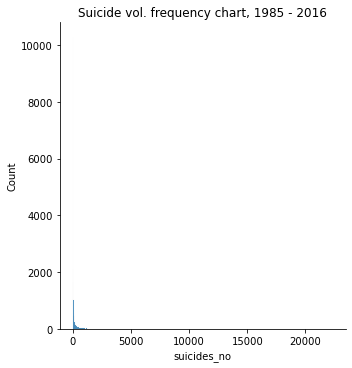

In [9]:
sns.displot(df, x = 'suicides_no');
plt.title('Suicide vol. frequency chart, 1985 - 2016');

The plot immediately shows that the majority of suicides are sitting somewhere within the range of approx. 2,000. Let's have a closer look at values < 5000 and below 2000 to confirm.

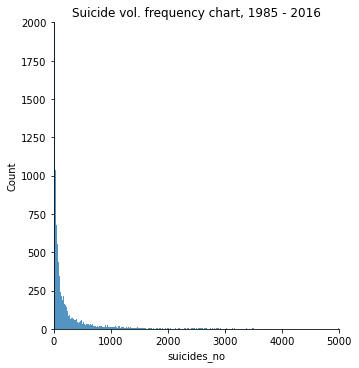

In [10]:
sns.displot(df, x = 'suicides_no');
plt.xlim(0,5000);
plt.ylim(0, 2000);
plt.title('Suicide vol. frequency chart, 1985 - 2016');

Let's look at boxplots and density distribution

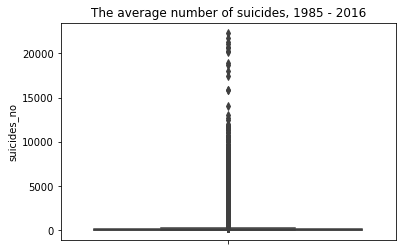

In [8]:
sns.boxplot(y = 'suicides_no', data = df);
plt.title('The average number of suicides, 1985 - 2016');

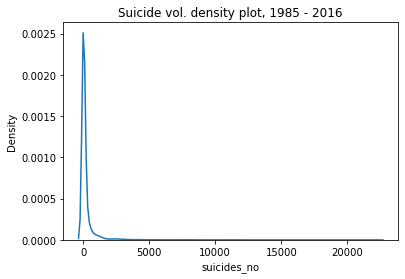

In [14]:
sns.kdeplot(df['suicides_no']);
plt.title('Suicide vol. density plot, 1985 - 2016');

The given data has very long tail on the number of suicides preliminary driven by high granularity of the dataset (data is given per country per generation). Let's see if re-aggregating the data by country and year would give us more meaningful result.

In [43]:
#renaming columns
df.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicidesper100kpop', 'country-year', 'HDI for year',
       'gdp_for_year_dollars', 'gdp_per_capita_dollars', 'generation']
#building aggregated dataframe for investigation
df_country = df[['country','year', 'population','suicides_no']].groupby(by=['country', 'year']).sum().reset_index()

#adding suicides per 100k pop
df_country['suicides_per_100k'] = df_country.suicides_no / df_country.population * 100000
df['gdp_for_year_dollars'] = df['gdp_for_year_dollars'].str.replace(',','')
df_country.head()

,country,year,population,suicides_no,suicides_per_100k
0,Albania,1987,2709600,73,2.694125
1,Albania,1988,2764300,63,2.279058
2,Albania,1989,2803100,68,2.425886
3,Albania,1992,2822500,47,1.665190
4,Albania,1993,2807300,73,2.600363


Let's revisit the metric after the transformation to see if more meaningful picture can be discovered

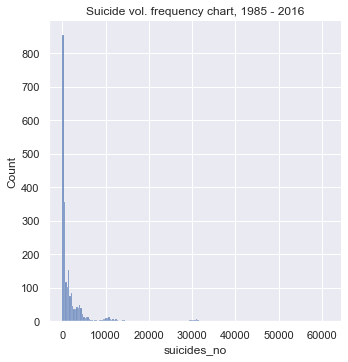

In [44]:
sns.displot(df_country, x = 'suicides_no');
plt.title('Suicide vol. frequency chart, 1985 - 2016');

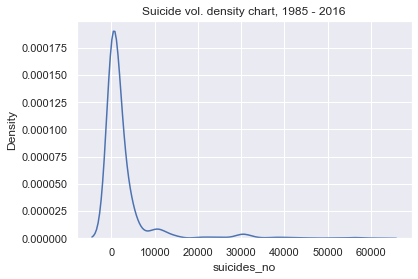

In [45]:
sns.kdeplot(df_country['suicides_no']);
plt.title('Suicide vol. density chart, 1985 - 2016');

The above chart makes way more sense with the majority of annual suicides per country sitting somewhere within the range below 10,000 cases. However, there is a long tail of suicides that lasts up until 60,000 cases.

Another interesting thing to notice are two peaks within the range of 10k-15k annual suicides and an area within the range of 30k-35k.

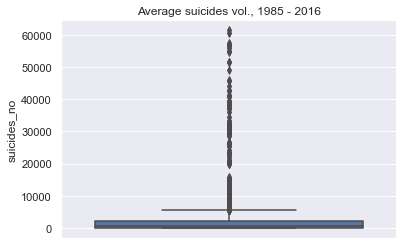

In [46]:
sns.boxplot(data = df_country, y = 'suicides_no');
plt.title('Average suicides vol., 1985 - 2016');

The above chart doesn't give much sense due to many outliers sitting above ~8k suicides per year, which we can investigate later.

Let's look at the boxplot body a bit closer to understand the average world figure a bit better.

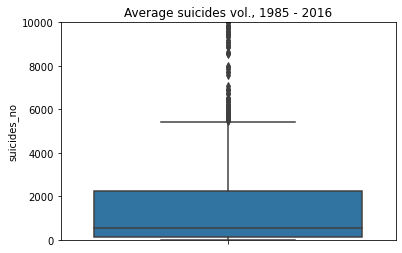

In [15]:
sns.boxplot(data = df_country, y = 'suicides_no')
plt.ylim(0, 10000);
plt.title('Average suicides vol., 1985 - 2016');

Above picture is way more optimistic.

Despite the number of outliers, the average aggregated picture is reassuring. 50% of all suicide numbers within the given number of countries and date ranges will be sitting below 1,000 people, and 75% of the whole dataset is below 2000, with the majority of 101 countries across 31 year of observations is sitting below 6,000 suicides per annum.

Let's investigate the suicide per 100k population before jumping into outliers investigation to identify if any of them needs to be removed from the dataset.

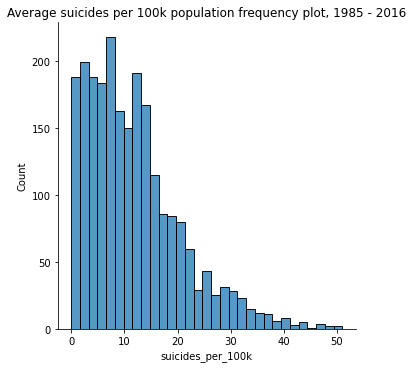

In [16]:
sns.displot(data = df_country, x = 'suicides_per_100k');
plt.title('Average suicides per 100k population frequency plot, 1985 - 2016');

We can see that world average across 31 year would be sitting somewhere within 10 suicides per 100k population. Overall, the dataset is heavily skewed to the right having non-normal distribution.

Together, after the investigation we can categorize outliers as countries having > 6000 suicides per year or over 31 suicide cases per 100k population. Let's review those in details.

C:\Users\varshith reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\varshith reddy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


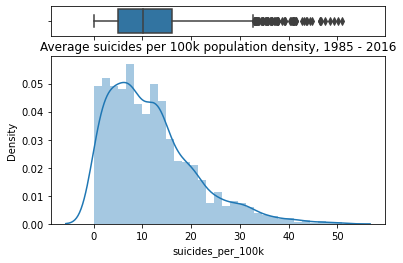

In [17]:
#density plot
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)});
# Add a graph in each part
sns.boxplot(df_country["suicides_per_100k"], ax=ax_box);
sns.distplot(df_country["suicides_per_100k"], ax=ax_hist);
plt.title('Average suicides per 100k population density, 1985 - 2016');
# Remove x axis name for the boxplot
ax_box.set(xlabel='');

In [18]:
countries_high_suicide = df_country.query('suicides_no > 6000 | suicides_per_100k > 31').country.unique()

#filtering data with high suicide rates to investigate a little bit further
high_suicide_countries_stats = df_country[df_country['country'].isin(countries_high_suicide)]
high_suicide_countries_stats

,country,year,population,suicides_no,suicides_per_100k
266,Belarus,1990,9408800,2085,22.160105
267,Belarus,1991,9476200,2169,22.888922
268,Belarus,1992,9570900,2424,25.326772
269,Belarus,1993,9641100,2885,29.923971
270,Belarus,1994,9653900,3153,32.660376
...,...,...,...,...,...
2266,United States,2011,290313825,39508,13.608722
2267,United States,2012,292827128,40596,13.863470
2268,United States,2013,295322862,41143,13.931532
2269,United States,2014,297749735,42769,14.364077


In [19]:
len(countries_high_suicide)

20

Let's investigate data distribution for countries with high suicide rates.

C:\Users\varshith reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\varshith reddy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


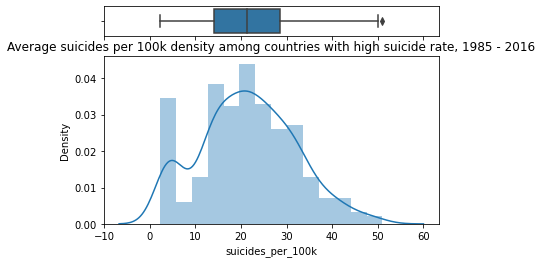

In [20]:
#density plot
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)});
plt.title('Average suicides per 100k density among countries with high suicide rate, 1985 - 2016');
# Add a graph in each part
sns.boxplot(high_suicide_countries_stats["suicides_per_100k"], ax=ax_box);
sns.distplot(high_suicide_countries_stats["suicides_per_100k"], ax=ax_hist);
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='');

In [21]:
high_suicide_countries_stats.query('suicides_per_100k > 50')

,country,year,population,suicides_no,suicides_per_100k
1255,Lithuania,1995,3387149,1694,50.012562
1256,Lithuania,1996,3375163,1722,51.019758


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
On countries with high suicide rates - we ended up having more normally distributed data while still having one outlier being Lithuania.

According to Wiki, high suicide rate is a significant social issue in the country due to its high rate reaching its peak in 1995 year.

In my further analysis I am going to categorize countries as low/moderate/high/extreme suicide rates and will try define if the population, Human Development Index, or GDP per capita have a strong influence on country suicide rates.

In [23]:
#Final wrangling before bivariate exploration
countries_gdp = df.iloc[:,[0,1,8,9,10]].groupby(by=['country', 'year']).mean().reset_index()

#joining two datasets together for further investigation

df_fin = pd.merge(countries_gdp, df_country)
df_fin

,country,year,HDI for year,gdp_per_capita_dollars,population,suicides_no,suicides_per_100k
0,Albania,1987,NaN,796.0,2709600,73,2.694125
1,Albania,1988,NaN,769.0,2764300,63,2.279058
2,Albania,1989,NaN,833.0,2803100,68,2.425886
3,Albania,1992,NaN,251.0,2822500,47,1.665190
4,Albania,1993,NaN,437.0,2807300,73,2.600363
...,...,...,...,...,...,...,...
2316,Uzbekistan,2010,0.655,1533.0,25651783,1464,5.707206
2317,Uzbekistan,2011,0.661,1767.0,25978049,1640,6.313022
2318,Uzbekistan,2012,0.668,1964.0,26381830,1835,6.955545
2319,Uzbekistan,2013,0.672,2150.0,26838924,1950,7.265567


In [24]:
#Categorizing countries by low/moderate/high/extreme suicide rates
df_fin['suicide_rates'] = pd.cut(df_fin['suicides_per_100k'], 5, labels=['extra-low','low','moderate','high','extreme'])

The dataset now is categorised based on suicides per 100k. Let's jump to bivariate exploration.

# Bivariate Exploration

As we can see from here, the average worldwide suicide rates been climbing up constantly to reach peak between 1985 to 1997, followed by a gradual decrease in rates until 2015. However, after they spiked again in 2016!

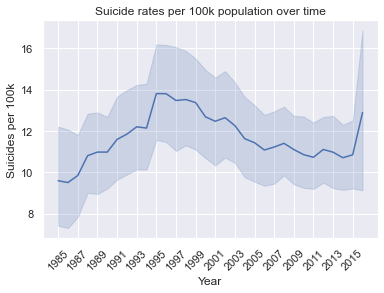

In [25]:
#look at how mean suicide rates been changing over time
sns.set_theme(style='darkgrid')
ax = sns.lineplot(x = 'year', y='suicides_per_100k', data = df_fin);
ax.set(xlabel = 'Year', ylabel = 'Suicides per 100k');
plt.title('Suicide rates per 100k population over time');
plt.xticks(np.arange(1985,2016, step = 2), rotation = 45);

Let's investigate potential dependencies / correlations between suicide rates and other factors including population, country GDP, GDP per capita and human development index wherever it is possible.

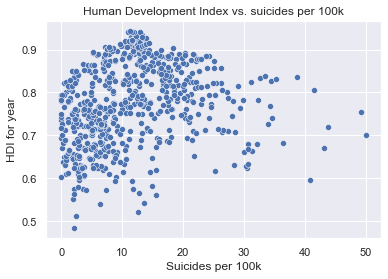

In [28]:
sns.scatterplot(data = df_fin, x = 'suicides_per_100k', y = 'HDI for year');
plt.title('Human Development Index vs. suicides per 100k');
plt.xlabel('Suicides per 100k');

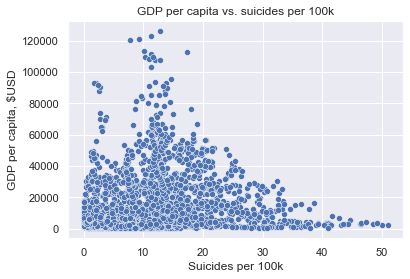

In [29]:
sns.scatterplot(data = df_fin, x = 'suicides_per_100k', y = 'gdp_per_capita_dollars');
plt.title('GDP per capita vs. suicides per 100k');
plt.xlabel('Suicides per 100k');
plt.ylabel('GDP per capita, $USD');

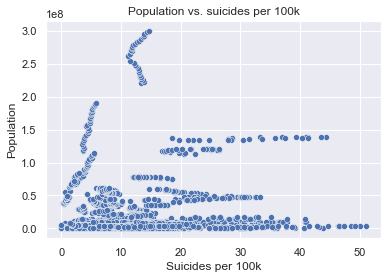

In [60]:
sns.scatterplot(data = df_fin, x = 'suicides_per_100k', y = 'population');
plt.title('Population vs. suicides per 100k');
plt.xlabel('Suicides per 100k');
plt.ylabel('Population');

# Multivariate Exploration

Based on the correlation matrix, there is nothing we can strongly associate with the plot.

A few mild/strong positive correlation points were discovered based between time variable and human development index, as well as GDP growth (good news). However, it is interesting to observe only a slight/weak correlation between gdp per capita and country gdp. That means that it is unlikely that if the country is producing more GDP, its households will get much richer.

Let's have a look into what's going on within the ratio of countries with different suicide rates over time.

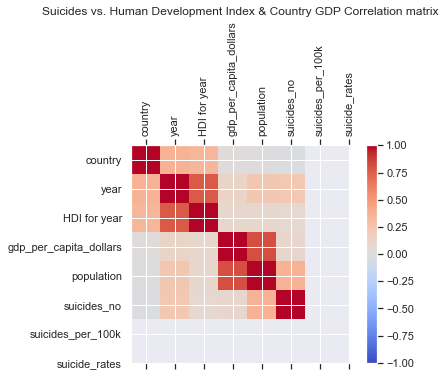

In [33]:
#correlation matrix
corr = df_fin.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_fin.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_fin.columns)
ax.set_yticklabels(df_fin.columns)
plt.title('Suicides vs. Human Development Index & Country GDP Correlation matrix');
plt.show()

We can see from the chart, that period 1996-2001 there was way higher number of countries with high suicide rates. As the world moves on, more countries are shifting from extreme cohorts towards lower cohort.

However, in the meantime, extra-low segment shows almost no improvement at all, what can set good targets in the future.

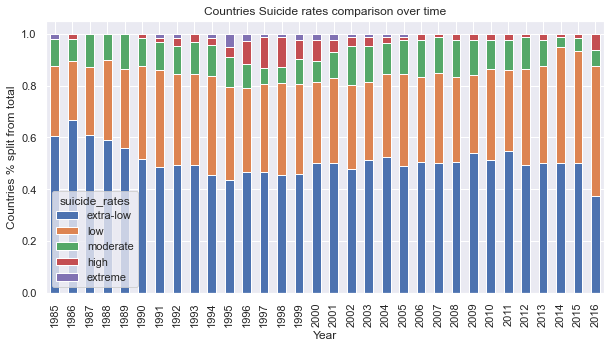

In [34]:
df_suicide = df_fin.groupby(['year','suicide_rates'])['country'].count().reset_index()
df_suicide = df_suicide.pivot(index = 'year', columns = 'suicide_rates', values = 'country')
df_suicide = df_suicide.div(df_suicide.sum(axis=1),axis=0);
sr = df_suicide.plot.bar(stacked = True, figsize = (10,5));
sr.set(xlabel = 'Year', ylabel = 'Countries % split from total');
plt.title('Countries Suicide rates comparison over time');

In this section, I want to put more focus to understand the relationship between countries with different suicide rates and key life characteristics, as well as to understand if high suicide rates are driven by a particular group/generation of people.

### Men tend to commit suicide more often, than women.
First of all, males tend to be more vulnerable group than females, as their suicide rates per 100k population is many times higher than females. That pattern is observed among all age groups, and observed consistently over the course of the given time period from 1985 to 2015.

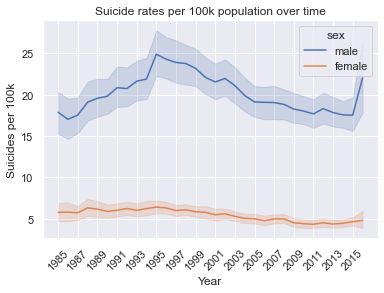

In [35]:
sns.set_theme(style='darkgrid')
ax = sns.lineplot(x = 'year', y='suicidesper100kpop', hue = 'sex', data = df);
ax.set(xlabel = 'Year', ylabel = 'Suicides per 100k');
plt.title('Suicide rates per 100k population over time');
plt.xticks(np.arange(1985,2016, step = 2), rotation = 45);

## WWII Generation reported highest suicide rates than everyone else
Based on the chart, G.I. Generation as well as Silent one tend to have the highest suicide rates per history.

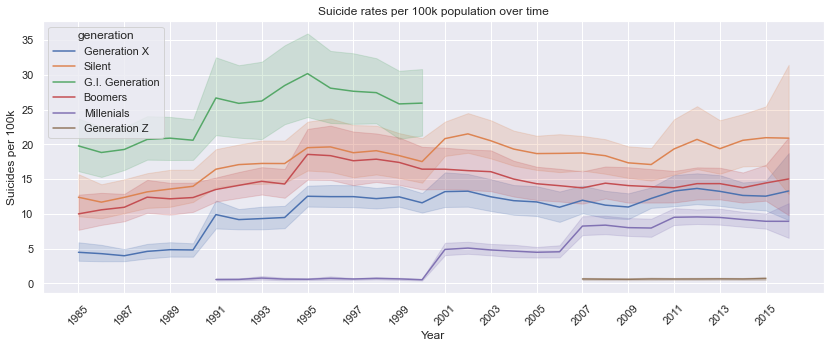

In [48]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(14,5))
ax = sns.lineplot(x = 'year', y='suicidesper100kpop', hue = 'generation', data = df);
ax.set(xlabel = 'Year', ylabel = 'Suicides per 100k');
plt.title('Suicide rates per 100k population over time');
plt.xticks(np.arange(1985,2016, step = 2), rotation = 45);

## WWII Generation reported highest suicide rates than everyone else
Based on the chart, the trend is similar across both males and females.

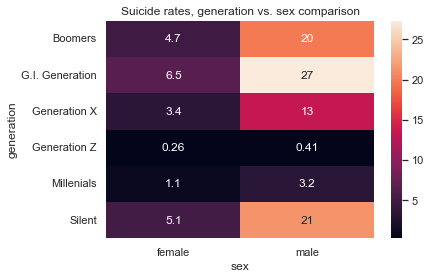

In [47]:
suicide_per_generation = df.pivot_table(values='suicidesper100kpop', index = 'generation', columns = 'sex', aggfunc = np.median)
sns.heatmap(suicide_per_generation, annot = True);
plt.title('Suicide rates, generation vs. sex comparison');
plt.show()

#### The older the person, the higher the suicide rate is.
Another interesting discovery was done based on the age. The older the group, the higher suicide rate per 100k population is. This trend is consistent across sex, and probably partially driven by decrease of the size of the group, as well as increased number of suicides.

It is alarming considering that planet population is getting older in general.

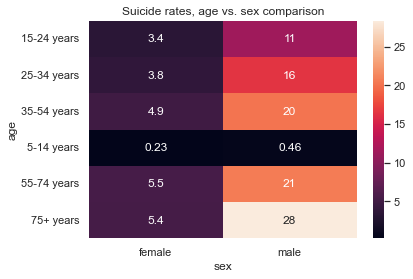

In [39]:
suicide_per_gender = df.pivot_table(values='suicidesper100kpop', index = 'age', columns = 'sex', aggfunc = np.median)
sns.heatmap(suicide_per_gender, annot = True);
plt.title('Suicide rates, age vs. sex comparison');
plt.show()

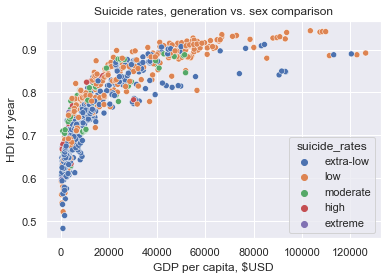

In [42]:
sns.scatterplot(data = df_fin, x = 'gdp_per_capita_dollars', y = 'HDI for year', hue = 'suicide_rates');
plt.title('Suicide rates, generation vs. sex comparison');
plt.xlabel('GDP per capita, $USD');

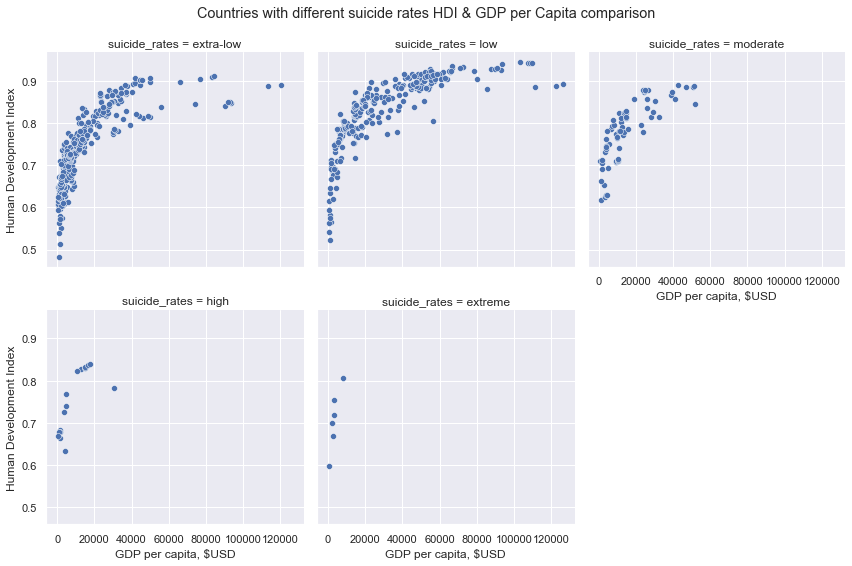

In [55]:
g = sns.FacetGrid(df_fin, col = 'suicide_rates',height=4, aspect= 1, col_wrap = 3);
g.map(sns.scatterplot,'gdp_per_capita_dollars', 'HDI for year');
g.set_axis_labels('GDP per capita, $USD', 'Human Development Index');
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Countries with different suicide rates HDI & GDP per Capita comparison');

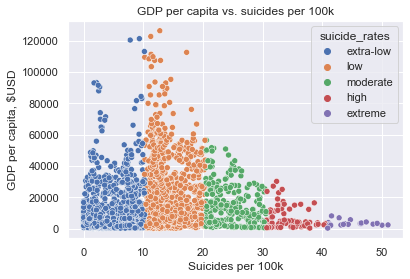

In [71]:
sns.scatterplot(data = df_fin, x = 'suicides_per_100k', y = 'gdp_per_capita_dollars', hue = 'suicide_rates');
plt.title('GDP per capita vs. suicides per 100k');
plt.xlabel('Suicides per 100k');
plt.ylabel('GDP per capita, $USD');

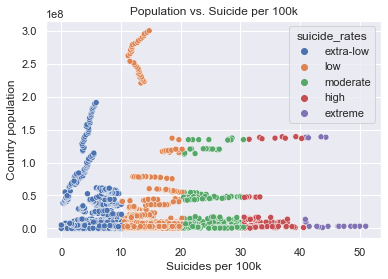

In [41]:
sns.scatterplot(data = df_fin, x = 'suicides_per_100k', y = 'population', hue = 'suicide_rates');
plt.xlabel('Suicides per 100k');
plt.title('Population vs. Suicide per 100k');
plt.ylabel('Country population');

# Conclusion

- Suicide are higher among men than women.
- Higher standards of living do not necessarily indicate lower suicide rates.
- Suicide numbers were decreasing up till 2010, after which they started rising again.
- Middle-aged people are more likely to commit suicides globally.
- The year, sex, and population are strong indicators when used to predict the number of suicides for a country.               
- There is a weak positive relationship between a countries GDP (per capita) and suicide rate.


C:\Users\varshith reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

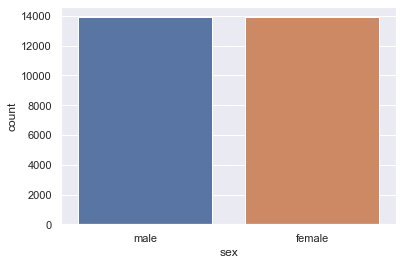

In [34]:
sns.countplot(df['sex'])
df['sex'].

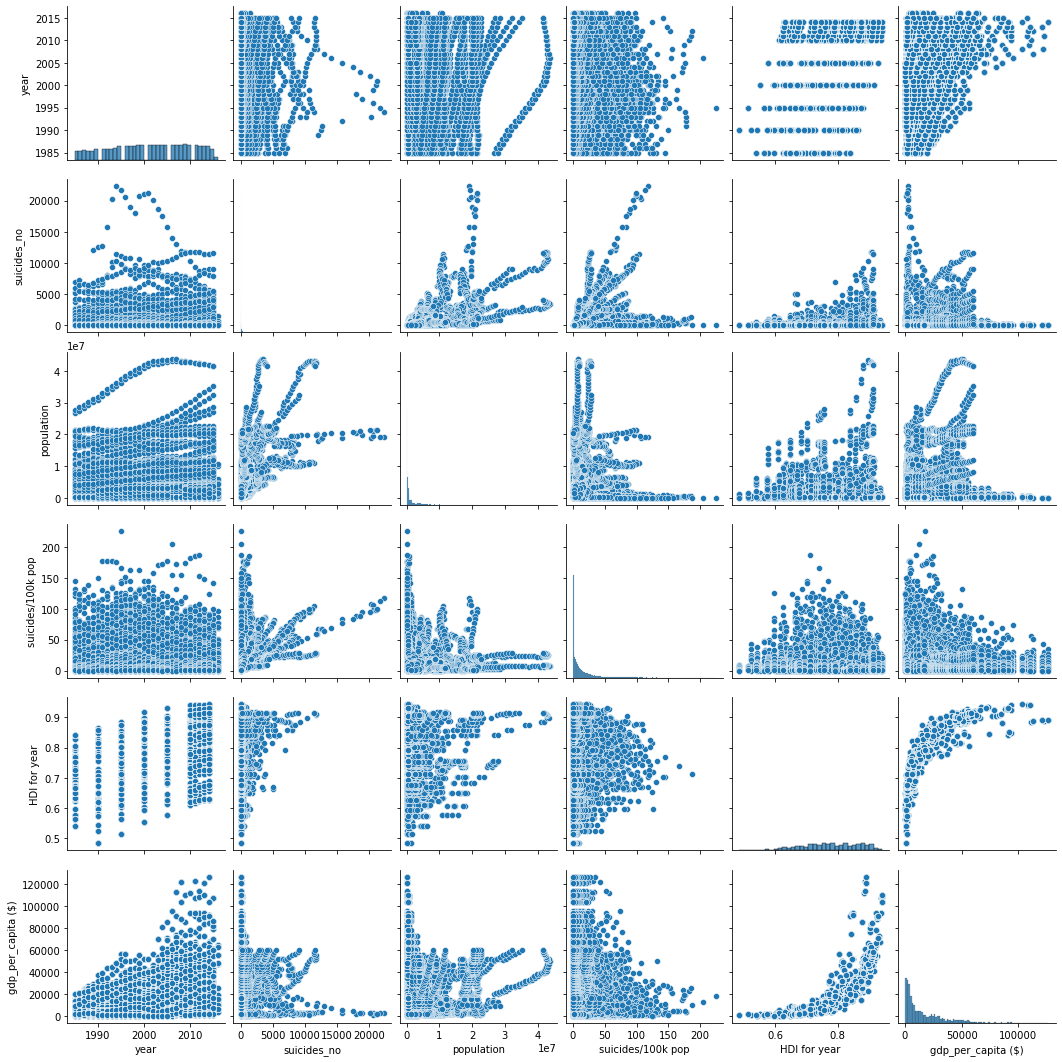

In [30]:
sns.pairplot(df)

<AxesSubplot:xlabel='population'>

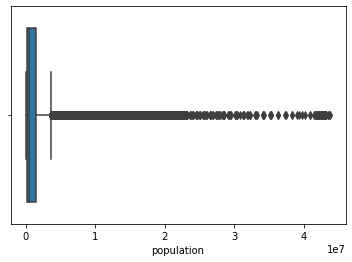

In [36]:
sns.boxplot(x=df['population'])

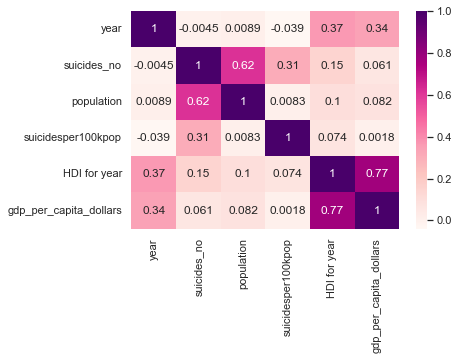

In [80]:
sns.heatmap(df.corr(),annot=True, cmap='RdPu')
plt.show()

<AxesSubplot:xlabel='year', ylabel='Count'>

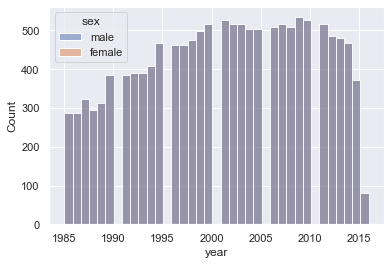

In [49]:
#kdeplot
sns.histplot(x='year',data=df,hue='sex')

<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='population'>

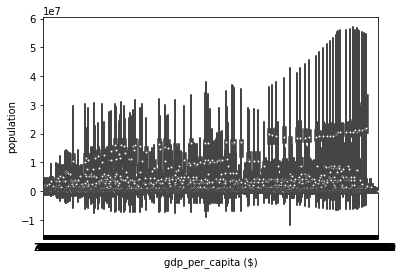

In [43]:
#violinplot
sns.violinplot(x=df["gdp_per_capita ($)"],y=df["population"])

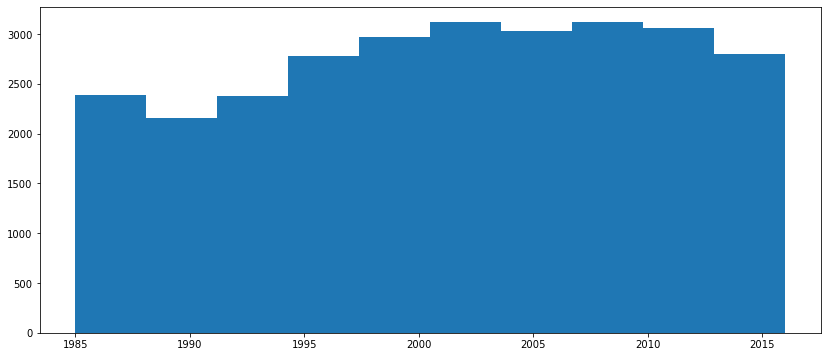

In [13]:
#Cheking Histogram
import matplotlib
from matplotlib import pyplot 
%matplotlib inline
pyplot.figure(figsize=(14,6))
pyplot.hist(df['year'])
pyplot.show()

In [14]:
#Help from Python
from scipy.stats import shapiro

DataToTest = df['year']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.96, p=0.000000000000000000000000000000
Not a normal distribution


C:\Users\varshith reddy\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [15]:
from numpy.random import randn
DataToTest = randn(100)

In [16]:
DataToTest

array([-6.52454517e-01,  1.12116139e+00,  6.65700653e-01, -1.03219098e+00,
        2.69155098e-01,  1.60786261e+00, -1.16325754e+00,  1.77082764e+00,
        4.71899485e-02,  1.47673565e+00,  4.31024567e-01, -9.71854838e-01,
        1.43196422e+00, -1.29682605e-01,  1.63188691e+00, -1.30052103e+00,
        1.33193693e+00, -2.18241787e+00, -9.17800137e-01, -1.18420834e+00,
       -3.39861937e-01,  4.71829285e-01,  5.89223681e-01,  9.14366099e-01,
       -2.51055643e-01,  3.01864436e-01,  2.67608414e-01,  5.21902575e-02,
       -8.06518672e-01,  5.34402238e-01,  3.01248858e-01, -6.54892733e-01,
        1.71499052e+00, -4.97692201e-01, -1.17996627e+00,  9.64968559e-02,
        8.13715924e-01,  1.31951936e+00,  3.49529930e-01, -1.18591386e-01,
        1.62868468e+00, -3.27015468e-01,  1.11077791e-01,  2.52476825e-01,
       -1.90370687e-01, -1.60909285e-01, -4.52433368e-02, -6.82817890e-01,
       -4.65485337e-01, -4.32175018e-03,  3.36736804e-01, -3.31973133e-01,
        1.20956956e-01, -

In [17]:
stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.99, p=0.541512668132781982421875000000
Normal distribution


In [18]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = df['year']

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not Normllay distributed')

stat=8646.0608168220, p=0.0000000000
Not Normllay distributed


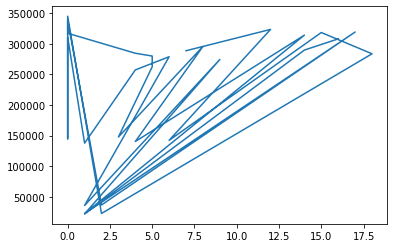

In [22]:
FirstSample = df[1:30]['suicides_no']
SecondSample = df[1:30]['population']

pyplot.plot(FirstSample,SecondSample)
pyplot.show()

In [23]:
#Spearman Rank Correlation
from scipy.stats import spearmanr
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.287, p=0.131081
independent samples


In [24]:
#pearson correlation
from scipy.stats import pearsonr
stat, p = pearsonr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.478, p=0.008679
dependent samples


In [25]:
df[1:30].corr(method="pearson")

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,0.306849,0.046407,0.432234,NaN,0.394902
suicides_no,0.306849,1.000000,0.478294,0.547169,NaN,0.284324
population,0.046407,0.478294,1.000000,-0.337102,NaN,-0.008222
suicides/100k pop,0.432234,0.547169,-0.337102,1.000000,NaN,0.367436
HDI for year,NaN,NaN,NaN,NaN,NaN,NaN
gdp_per_capita ($),0.394902,0.284324,-0.008222,0.367436,NaN,1.000000


In [26]:
contingency_data = pd.crosstab(df['country'], df['generation'],margins = False)

In [27]:
contingency_data

generation,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
country,,,,,,
Albania,48,30,64,8,50,64
Antigua and Barbuda,62,40,74,14,62,72
Argentina,68,44,88,18,72,82
Armenia,56,24,66,18,68,66
Aruba,26,6,36,10,42,48
...,...,...,...,...,...,...
United Arab Emirates,10,0,14,8,16,24
United Kingdom,68,44,88,18,72,82
United States,68,44,88,18,72,82


In [28]:
from scipy.stats import chi2_contingency

In [29]:
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

stat=590.355, p=0.003
dependent categories


In [30]:
contingency_data = [[25,125],[1200,240]] #Observe the numbers carefully

In [31]:
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

stat=337.622, p=0.000
dependent categories
